# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the terrorism dataset into a DataFrame

In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')

# Explore the dataset

## Preview the first few rows

In [3]:
df.head() 

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Number of rows and columns in the dataset

In [4]:
df.shape 

(181691, 135)

In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## Select only important columns

In [6]:
df = df[['iyear','imonth','iday','extended','country_txt','provstate','region_txt','attacktype1_txt','target1','nkill',
         'nwound','summary','gname','targtype1_txt','targsubtype1_txt','weaptype1_txt','motive','city','latitude','longitude']]
df.shape

(181691, 20)

## Rename columns

In [7]:
df.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                   'provstate':'State','region_txt':'Region','attacktype1_txt':'Attack_Type','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Gang_name','targtype1_txt':'Target_type',
                   'targsubtype1_txt':'Target_subtype','weaptype1_txt':'Weapon_type','motive':'Motive','city':'City',
                   'latitude':'Latitude','longitude':'Longitude'},inplace=True)
df.head()

,Year,Month,Day,Extended,Country,State,Region,Attack_Type,Target,Killed,Wounded,Summary,Gang_name,Target_type,Target_subtype,Weapon_type,Motive,City,Latitude,Longitude
0,1970,7,2,0,Dominican Republic,NaN,Central America & Caribbean,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Named Civilian,Unknown,NaN,Santo Domingo,18.456792,-69.951164
1,1970,0,0,0,Mexico,Federal,North America,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Unknown,NaN,Mexico city,19.371887,-99.086624
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,NaN,Unknown,15.478598,120.599741
3,1970,1,0,0,Greece,Attica,Western Europe,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Embassy/Consulate,Explosives,NaN,Athens,37.997490,23.762728
4,1970,1,0,0,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Embassy/Consulate,Incendiary,NaN,Fukouka,33.580412,130.396361


## Statistical summary of numerical columns

In [8]:
df.describe() 

,Year,Month,Day,Extended,Killed,Wounded,Latitude,Longitude
count,181691.000000,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000,177135.000000,1.771340e+05
mean,2002.638997,6.467277,15.505644,0.045346,2.403272,3.167668,23.498343,-4.586957e+02
std,13.259430,3.388303,8.814045,0.208063,11.545741,35.949392,18.569242,2.047790e+05
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,0.000000,11.510046,4.545640e+00
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,0.000000,31.467463,4.324651e+01
75%,2014.000000,9.000000,23.000000,0.000000,2.000000,2.000000,34.685087,6.871033e+01
max,2017.000000,12.000000,31.000000,1.000000,1570.000000,8191.000000,74.633553,1.793667e+02


## Get information about the dataset

In [9]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Extended        181691 non-null  int64  
 4   Country         181691 non-null  object 
 5   State           181270 non-null  object 
 6   Region          181691 non-null  object 
 7   Attack_Type     181691 non-null  object 
 8   Target          181055 non-null  object 
 9   Killed          171378 non-null  float64
 10  Wounded         165380 non-null  float64
 11  Summary         115562 non-null  object 
 12  Gang_name       181691 non-null  object 
 13  Target_type     181691 non-null  object 
 14  Target_subtype  171318 non-null  object 
 15  Weapon_type     181691 non-null  object 
 16  Motive          50561 non-null   object 
 17  City      

## Handle missing values

In [10]:
df.isna().sum()

Year                   0
Month                  0
Day                    0
Extended               0
Country                0
State                421
Region                 0
Attack_Type            0
Target               636
Killed             10313
Wounded            16311
Summary            66129
Gang_name              0
Target_type            0
Target_subtype     10373
Weapon_type            0
Motive            131130
City                 434
Latitude            4556
Longitude           4557
dtype: int64

In [11]:
df['Killed']=df['Killed'].fillna(df['Killed'].mean())

In [12]:
df['Wounded']=df['Wounded'].fillna(df['Wounded'].mean())

In [13]:
df['Latitude']=df['Latitude'].fillna(df['Latitude'].mean())

In [14]:
df['Longitude']=df['Longitude'].fillna(df['Longitude'].mean())

In [15]:
df.isna().sum()

Year                   0
Month                  0
Day                    0
Extended               0
Country                0
State                421
Region                 0
Attack_Type            0
Target               636
Killed                 0
Wounded                0
Summary            66129
Gang_name              0
Target_type            0
Target_subtype     10373
Weapon_type            0
Motive            131130
City                 434
Latitude               0
Longitude              0
dtype: int64

In [16]:
df.dropna(inplace=True)
df.shape

(47857, 20)

## Attacks by kind of weapon

In [17]:
print("Types of weapons used are\n",df['Weapon_type'].unique())

Types of weapons used are
 ['Firearms' 'Incendiary' 'Explosives' 'Sabotage Equipment' 'Melee'
 'Chemical' 'Unknown' 'Other' 'Fake Weapons'
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'
 'Biological' 'Radiological']


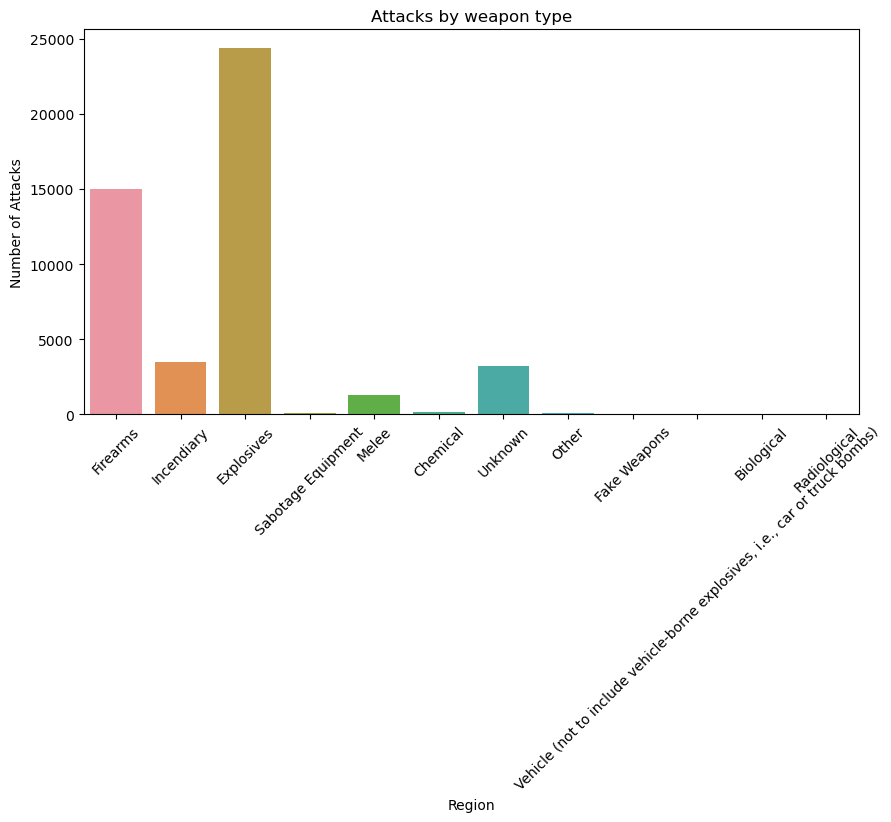

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df.Weapon_type)
plt.title('Attacks by weapon type')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

## Years witnessed the most terrorist activity

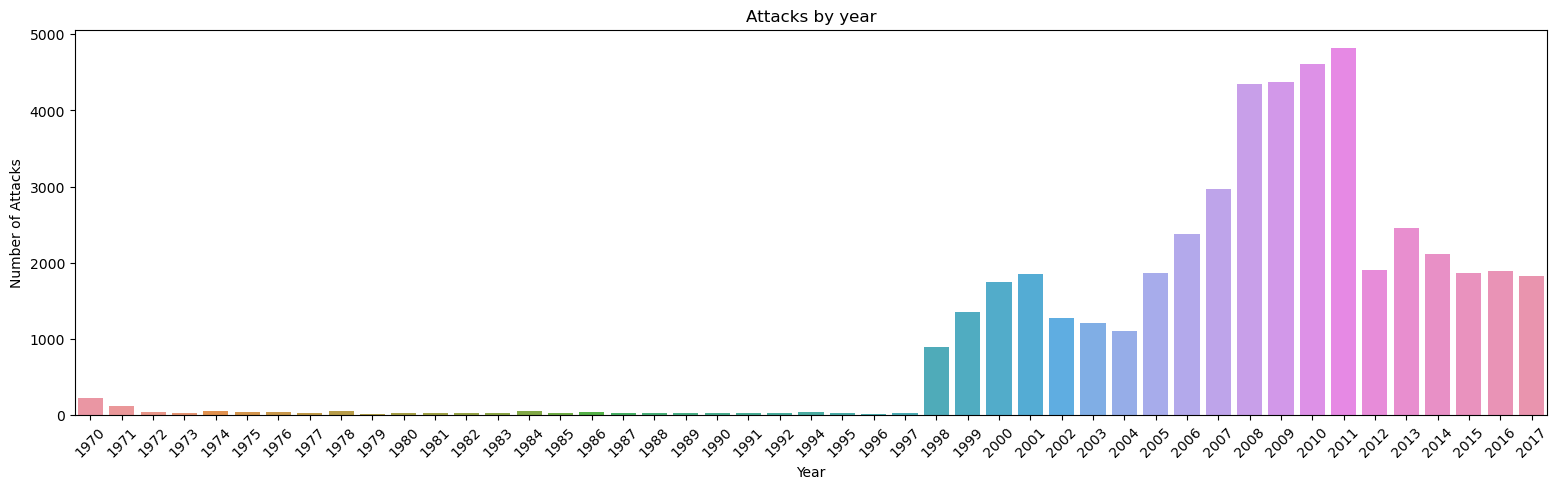

In [19]:
plt.figure(figsize=(19, 5))
sns.countplot(x=df.Year)
plt.title('Attacks by year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

## Months witnessed the most terrorist activity

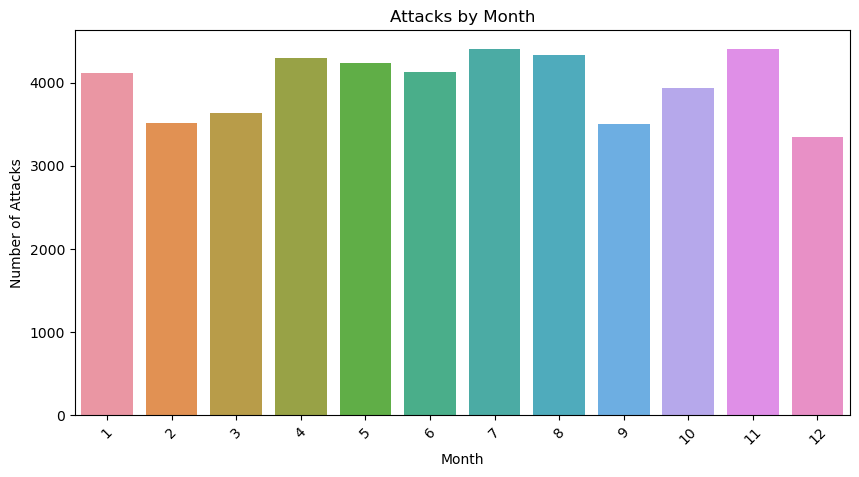

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df.Month)
plt.title('Attacks by Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

## Attack types

In [21]:
print("Attack types are\n",df['Attack_Type'].unique())

Attack types are
 ['Armed Assault' 'Facility/Infrastructure Attack' 'Bombing/Explosion'
 'Assassination' 'Hijacking' 'Unarmed Assault'
 'Hostage Taking (Kidnapping)' 'Hostage Taking (Barricade Incident)'
 'Unknown']


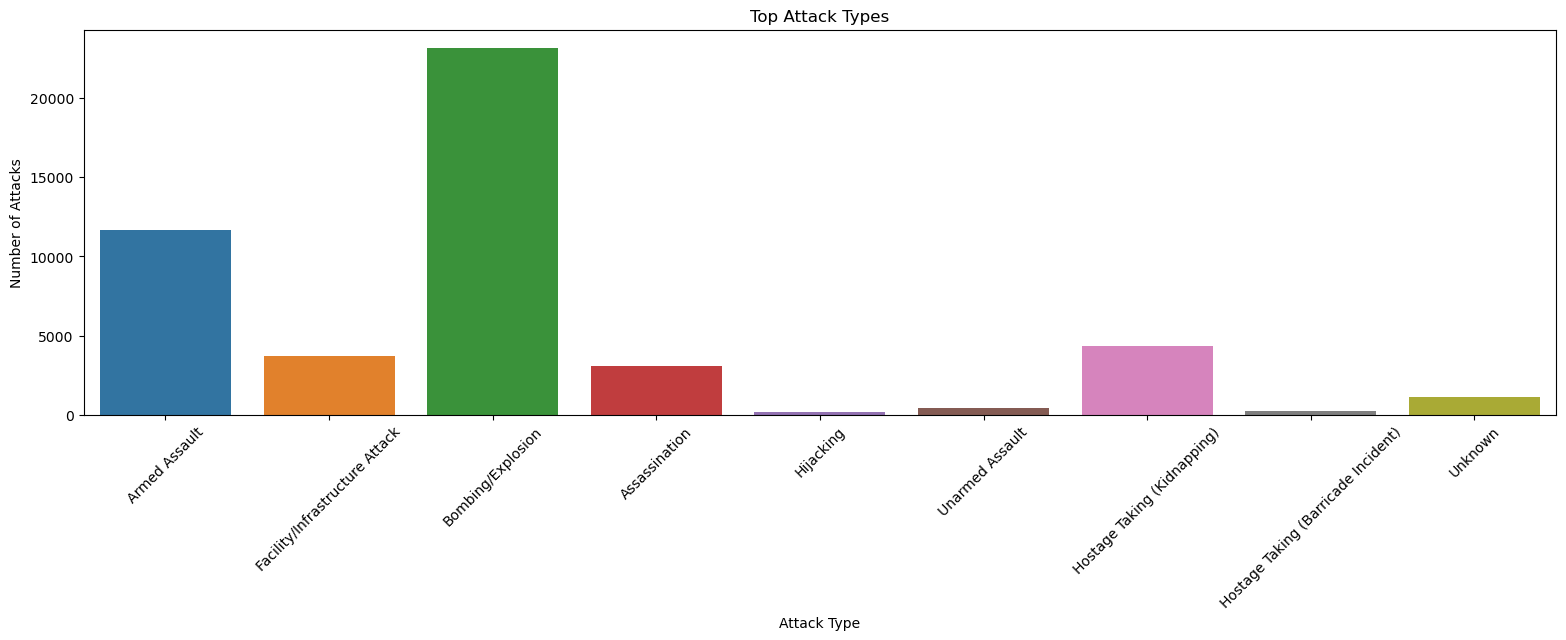

In [22]:
# Visualize the hot zones
plt.figure(figsize=(19, 5))
sns.countplot(x=df['Attack_Type'])
plt.title('Top Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

## Target categories

In [23]:
print("Target categories are\n",df['Target_type'].unique())

Target categories are
 ['Police' 'Military' 'Government (General)' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Private Citizens & Property' 'Transportation' 'Utilities'
 'Religious Figures/Institutions' 'Telecommunication'
 'Government (Diplomatic)' 'Journalists & Media' 'NGO'
 'Food or Water Supply' 'Airports & Aircraft'
 'Terrorists/Non-State Militia' 'Abortion Related' 'Tourists' 'Maritime'
 'Other']


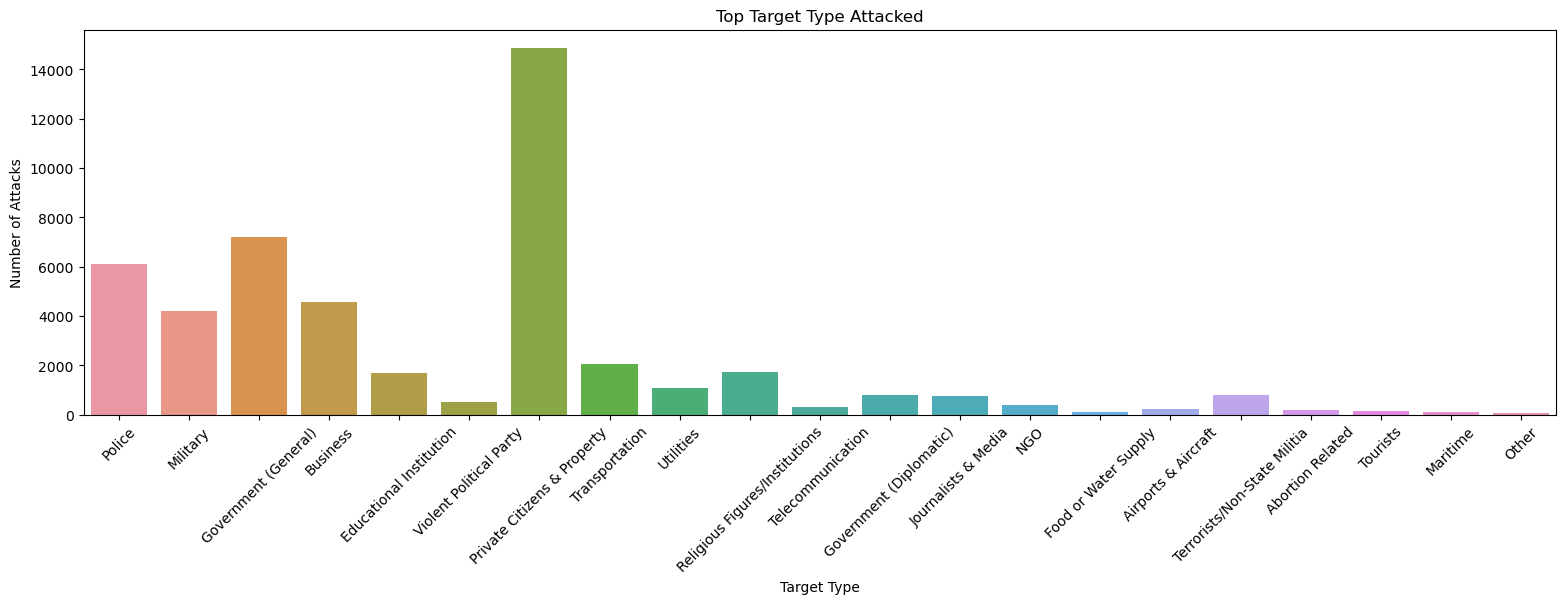

In [24]:
# Visualize the hot zones
plt.figure(figsize=(19, 5))
sns.countplot(x=df['Target_type'])
plt.title('Top Target Type Attacked')
plt.xlabel('Target Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

## Regions that witnessed the largest number of terrorist attacks

In [25]:
# Analyze the hot zones
hot_zones = df['Region'].value_counts().head(10)  # Top 10 regions with the most attacks
print(hot_zones)

South Asia                    15954
Middle East & North Africa    14771
Southeast Asia                 4690
Sub-Saharan Africa             4194
Western Europe                 2336
Eastern Europe                 2123
South America                  1744
North America                  1547
Central Asia                    221
East Asia                       154
Name: Region, dtype: int64


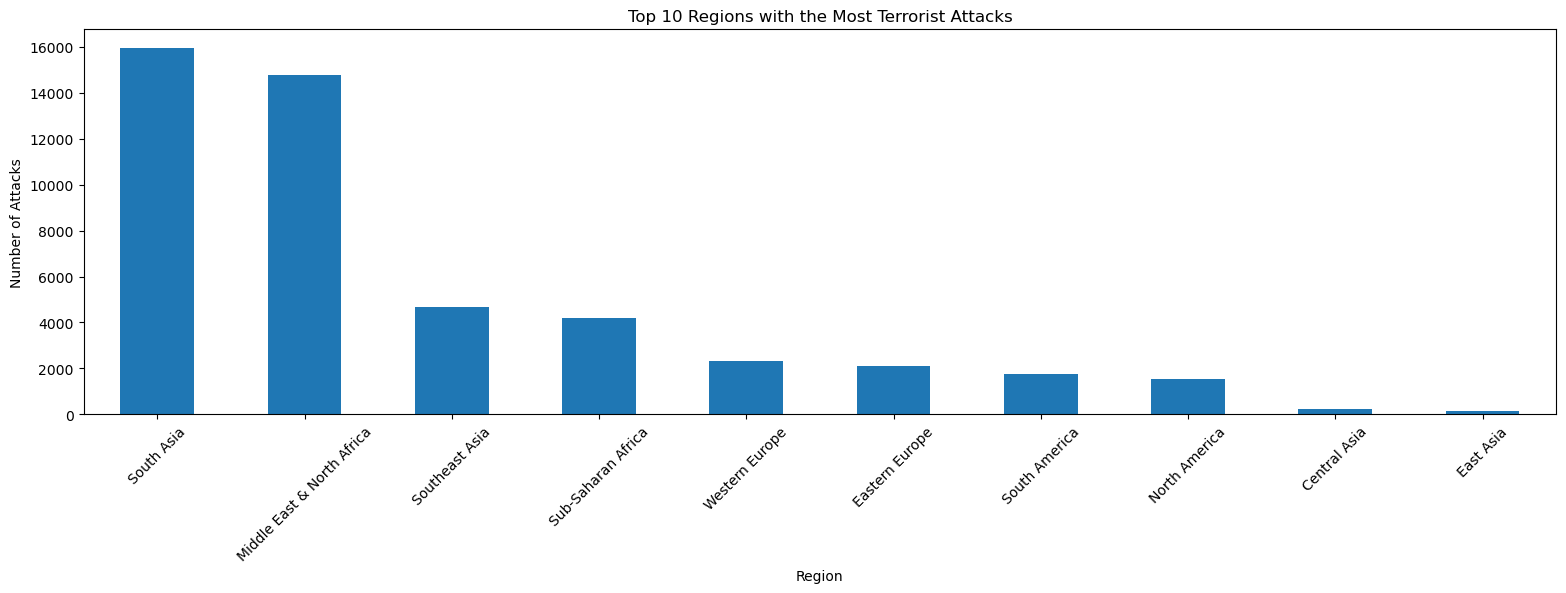

In [26]:
# Visualize the hot zones
plt.figure(figsize=(19, 5))
hot_zones.plot(kind='bar')
plt.title('Top 10 Regions with the Most Terrorist Attacks')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

## Countries that witnessed the largest number of terrorist attacks

In [27]:
Total_Countries=df['Country'].nunique()
print(Total_Countries, "Countries are indicated in the data")

165 Countries are indicated in the data


In [28]:
# Analyze the Affected countries
Affected_countries = df['Country'].value_counts().head(10)  # Top 10 Affected_countries with the most attacks
print("Top 10 Affected Countries\n")
print(Affected_countries)

Top 10 Affected Countries

Iraq             9045
India            5437
Pakistan         4874
Afghanistan      3306
Philippines      2235
Thailand         1725
Russia           1494
Colombia         1477
United States    1427
Algeria          1407
Name: Country, dtype: int64


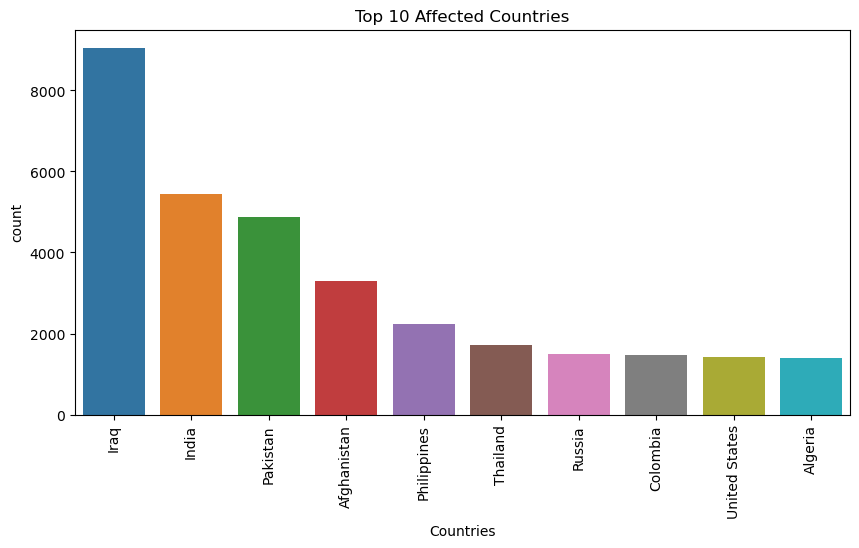

In [29]:
plt.figure(figsize = (10,5))
sns.barplot(x=df['Country'].value_counts()[:10].index, y=df['Country'].value_counts()[:10].values)
plt.title('Top 10 Affected Countries')
plt.xlabel('Countries')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

## States that witnessed the largest number of terrorist attacks

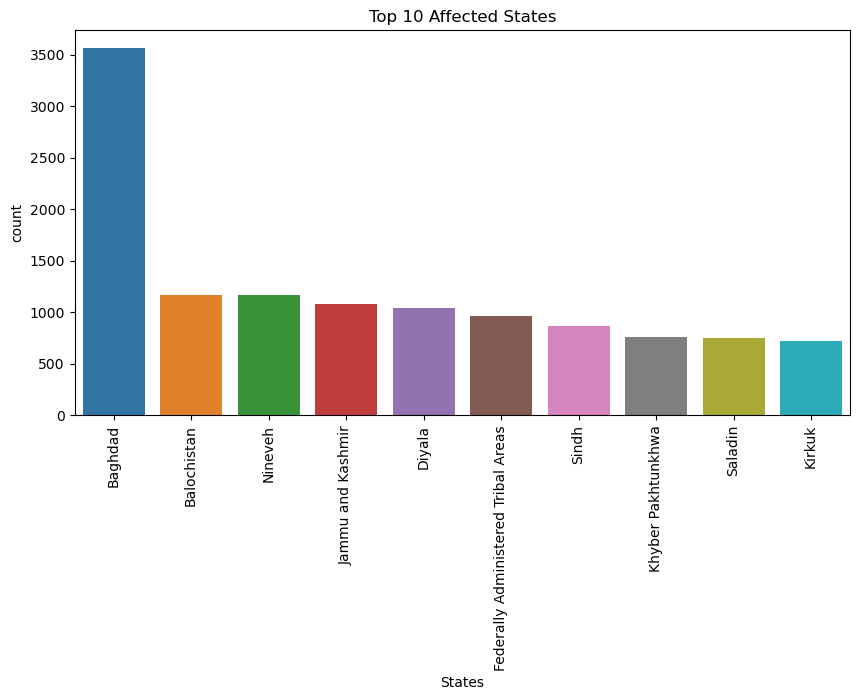

In [30]:
plt.figure(figsize = (10,5))
sns.barplot(x=df['State'].value_counts()[:10].index, y=df['State'].value_counts()[:10].values)
plt.title('Top 10 Affected States')
plt.xlabel('States')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

## Most terrorist groups are involved

In [31]:
print("Gangs names are\n",df['Gang_name'].unique())

Gangs names are
 ['Black Nationalists' "New Year's Gang" 'Left-Wing Militants' ...
 'Nepali Congress Party (NC)' 'Bedouin Israeli extremists'
 'Fatoni Warriors']


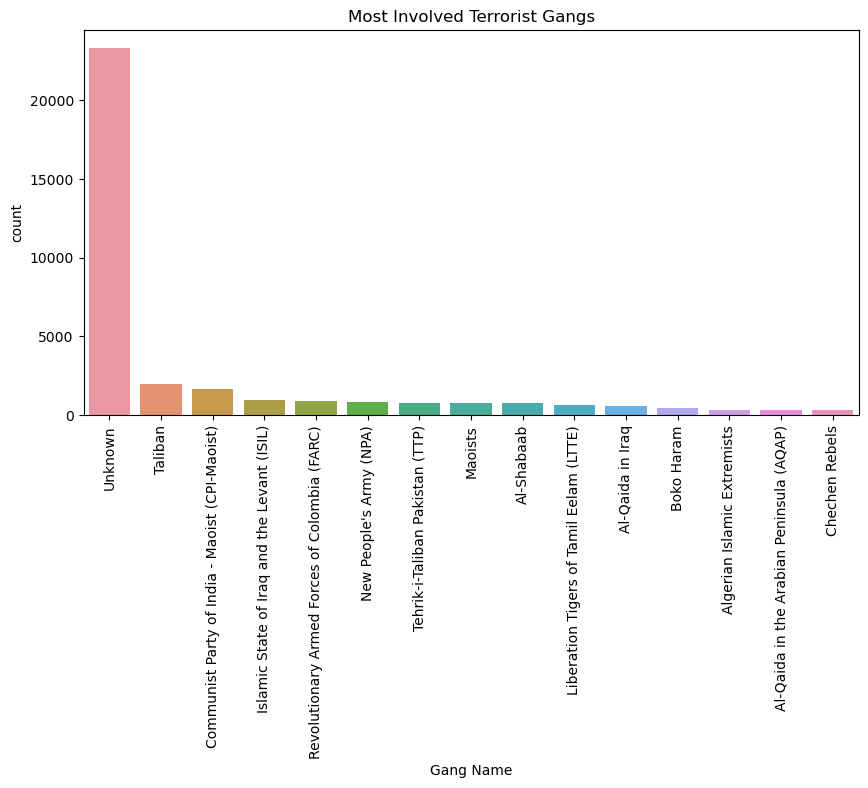

In [32]:
plt.figure(figsize = (10,5))
sns.barplot(x=df['Gang_name'].value_counts()[:15].index,y=df['Gang_name'].value_counts()[:15].values)
plt.title('Most Involved Terrorist Gangs')
plt.xlabel('Gang Name')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

# The Analysis' Results:

### After observing many charts,  Reached the following conclusions:

1. The country most vulnerable to attack: Iraq
2. The State most vulnerable to attack: Baghdad
3. The region most vulnerable to attack: South Asia
4. Most types of targets in attacks: Violent Political Party
6. The type of weapon most often used in attacks: Explosives
6. The year that witnessed the largest number of attacks: 2011